# CH03 - Questions & Exercises

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_decision_regions

## Implement decision tree classifier.

### Load and prepare dataset

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train Decision Tree Classifier

In [5]:
from ch03.models import DecisionTreeClassifier

In [6]:
dtc = DecisionTreeClassifier(max_depth=5, criterion="entropy")
dtc.fit(X_train_std, y_train)

In [7]:
yhat_test = dtc.predict(X_test_std)
print("Accuracy: %.2f%%" % (100*sum(yhat_test == y_test)/y_test.shape[0]))

Accuracy: 97.78%


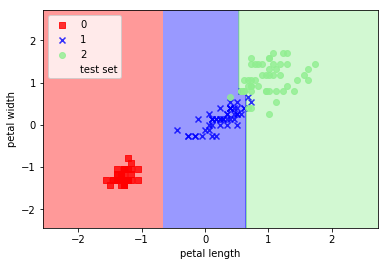

In [8]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=dtc, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

### K-Nearest Neighbors Classifier

In [10]:
from ch03.models import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std, y_train)

In [33]:
yhat_test = knn.predict(X_test_std)
print("Accuracy: %.2f%%" % (100*sum(yhat_test == y_test)/y_test.shape[0]))

Accuracy: 100.00%


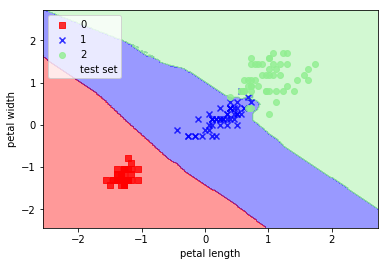

In [34]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

## Revision: Select the best model for predicting type of wine (wine datset)

### Load required modules

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [114]:
def accuracy(clf, X, y):
    yhat = clf.predict(X)
    return sum(yhat_test == y_test)/y_test.shape[0]

### Load and preprocess dataset

In [70]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Plot wines' types regarding their features

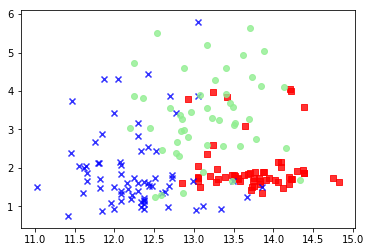

In [84]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

for idx, cl in enumerate(np.unique(y)):
     plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

### Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtc.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
yhat_test = dtc.predict(X_test_std)
print("Accuracy: %.2f%%" % (100*sum(yhat_test == y_test)/y_test.shape[0]))

Accuracy: 94.44%


### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(criterion="entropy", n_estimators=100, n_jobs=2)
rfc.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
yhat_test = rfc.predict(X_test_std)
print("Accuracy: %.2f%%" % (100*sum(yhat_test == y_test)/y_test.shape[0]))

Accuracy: 100.00%


### K-nearest Neighbors Classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [144]:
print("Accuracy: %.2f%%" % (100*accuracy(knn, X_test_std, y_test)))

Accuracy: 94.44%


#### Determine the optimal number of neighbors

In [131]:
output = []
for k in range(5, 100, 5):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
    knn.fit(X_train_std, y_train)
    output.append((k, accuracy(knn, X_train_std, y_train), accuracy(knn, X_test_std, y_test)))

### Support Vecotr Machines

In [155]:
from sklearn.svm import SVC

In [156]:
svm = SVC(kernel="rbf", C=10.0, random_state=1, gamma=0.10)
svm.fit(X_train_std, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
print("Accuracy: %.2f%%" % (100*accuracy(svm, X_test_std, y_test)))

Accuracy: 94.44%


### Logistic Regression Model

In [159]:
from sklearn.linear_model import LogisticRegression

In [163]:
lrm = LogisticRegression()
lrm.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
print("Accuracy: %.2f%%" % (100*accuracy(lrm, X_test_std, y_test)))

Accuracy: 94.44%


### Perceptron

In [167]:
from sklearn.linear_model import Perceptron

In [171]:
ppn = Perceptron(max_iter=100, eta0=0.1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [172]:
print("Accuracy: %.2f%%" % (100*accuracy(lrm, X_test_std, y_test)))

Accuracy: 94.44%
